In [113]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import yaml

In [114]:
import itertools
hopt_dir = '../results/augment_run_0003/'

all_results = []
all_labels = []

augmentation_strategies = itertools.product((True, False), repeat=3)

for count, augment in enumerate(augmentation_strategies):
    
    runname = 'split_3_%d' % count
    loadpath = hopt_dir + runname + '/best_and_final.yaml'
    
    if not os.path.exists(loadpath):
        continue
        
    all_results.append(yaml.load(open(loadpath)))
    all_labels.append(str(augment))

In [115]:
best_acc = [res['best_val_acc'] for res in all_results]
final_acc = [res['final_val_acc'] for res in all_results]
best_loss = [res['best_val_loss'] for res in all_results]
final_loss = [res['final_val_loss'] for res in all_results]

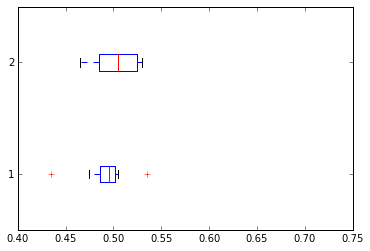

In [116]:
plt.boxplot([best_acc, final_acc], 0, '+r', 0);
plt.plot([0.75, 0.75], [1, 2]);

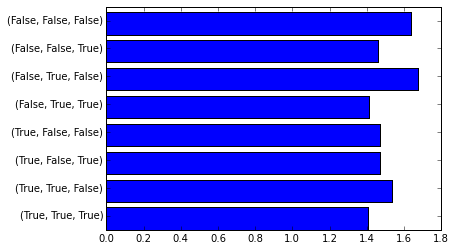

In [117]:
plt.barh(np.arange(len(best_loss)), final_loss)
plt.gca().set_yticks(np.arange(len(best_loss)) + 0.5)
plt.gca().set_yticklabels(all_labels);

(0.4, 0.6)

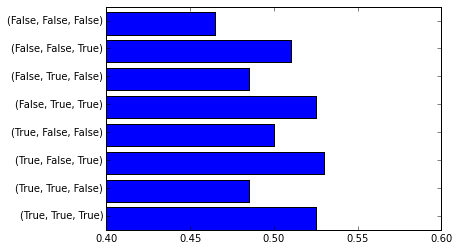

In [118]:
plt.barh(np.arange(len(final_acc)), final_acc)
plt.gca().set_yticks(np.arange(len(best_acc)) + 0.5)
plt.gca().set_yticklabels(all_labels)
plt.xlim(0.4, 0.6)

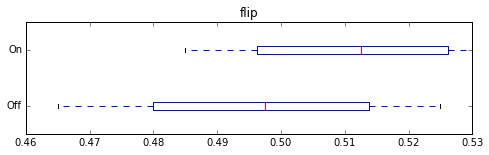

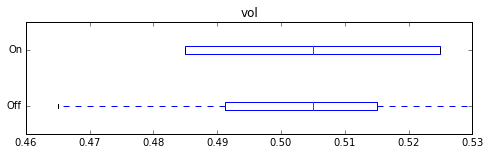

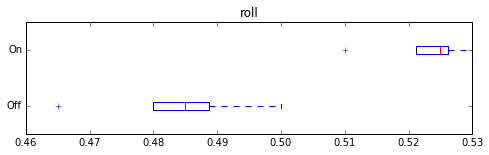

In [119]:
to_use = np.array(final_acc)
labels = ['flip', 'vol', 'roll']
vals = np.array(list(itertools.product((0, 1), repeat=3))).astype(bool)

for onoff, label in zip(vals.T, labels):
    
    val = (to_use[onoff], to_use[~onoff])
    plt.figure(figsize=(8, 2))
    plt.boxplot(val, 0, '+b', 0)
    plt.title(label)
    plt.gca().set_yticklabels(['Off', 'On'])